In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt






d = pd.read_csv("scores.csv")

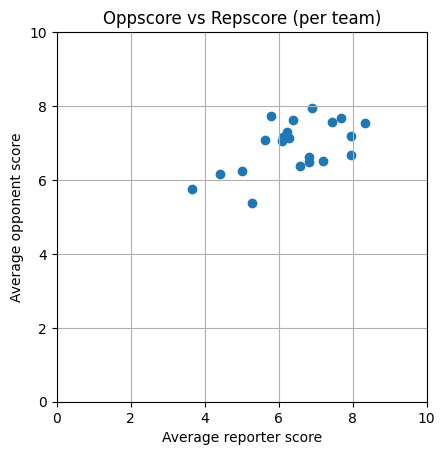

In [3]:
repscore = []
oppscore = []
for c in d["country"].unique():
    repscore.append(d.loc[(d['country'] == c) & (d["role"] == "Rep"), "score"].mean())
    oppscore.append(d.loc[(d['country'] == c) & (d["role"] == "Opp"), "score"].mean())




fig1, ax = plt.subplots()
ax.grid()
plt.title("Oppscore vs Repscore (per team)")
ax.scatter(repscore, oppscore)
ax.set_xlabel("Average reporter score")
ax.set_ylabel("Average opponent score")
ax.set_xlim(0, 10)

ax.set_ylim(0, 10)
ax.set_box_aspect(1)
plt.show()

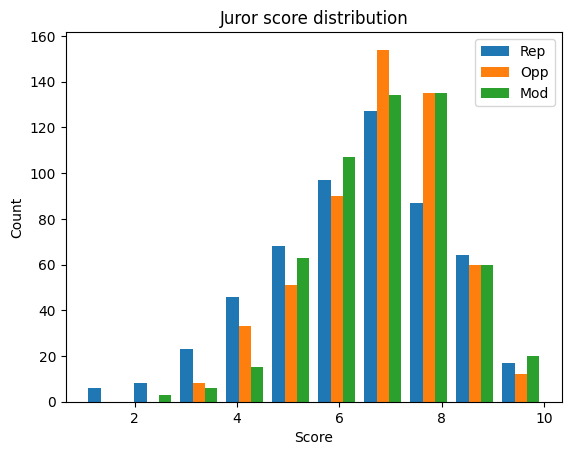

In [60]:
scores = np.zeros(10)


a = [
    d.loc[(d["role"] == "Rep"), "score"], 
    d.loc[ (d["role"] == "Opp"), "score"],
    d.loc[ (d["role"] == "Mod"), "score"]]

plt.title("Juror score distribution")
plt.hist(a, label=["Rep", "Opp", "Mod"])
plt.xlabel("Score")
plt.ylabel("Count")
plt.legend()

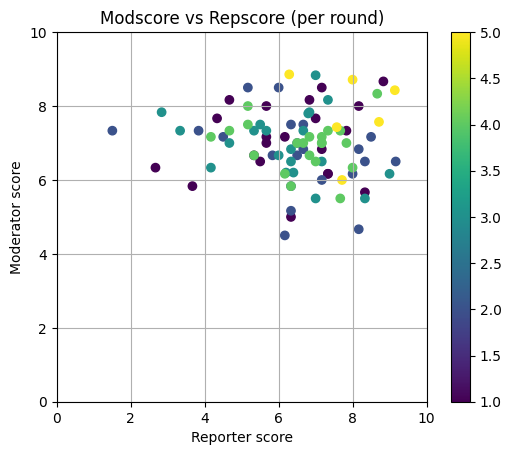

In [61]:
repscore = []
oppscore = []
colour = []

n = 0


for f in d["fight"].unique():
    for r in d["round"].unique():
            repscore.append(d.loc[(d["role"] == "Rep") & (d["fight"]== f) & (d["round"]==r), "score"].mean())
            oppscore.append(d.loc[(d["role"] == "Opp") & (d["fight"]== f) & (d["round"]==r), "score"].mean())
            a = d.loc[(d["fight"]== f) & (d["round"]==r), "fightName"]
            #if len(a) > 0:
            colour.append(int(a.iloc[0][0]))




fig1, ax = plt.subplots()
ax.grid()
plt.title("Oppscore vs Repscore (per round)")
sc = ax.scatter(repscore, oppscore, c=colour, cmap="virvidis")
ax.set_xlabel("Reporter score")
ax.set_ylabel("Opponent score")
ax.set_xlim(0, 10)

ax.set_ylim(0, 10)
ax.set_box_aspect(1)
plt.colorbar(sc)
plt.show()

(0.0, 10.0)

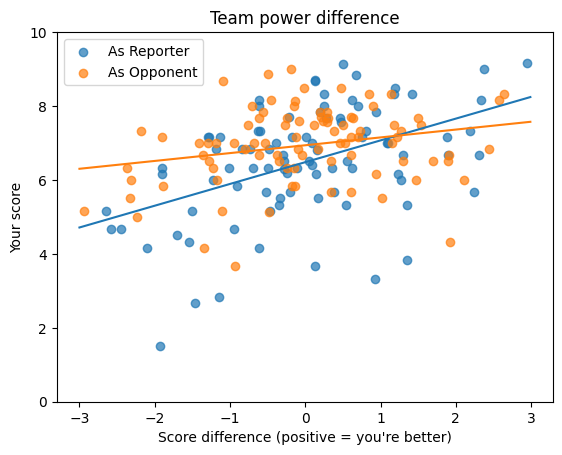

In [172]:
teamname = []
scoresum = []
teamscores = {}
countries = d["country"].unique()
for c in countries:
    scoresum.append(
        (d.loc[(d['country'] == c) & (d["role"] == "Rep"), "score"].mean() * 3+
        d.loc[(d['country'] == c) & (d["role"] == "Opp"), "score"].mean() * 2 +
        d.loc[(d['country'] == c) & (d["role"] == "Mod"), "score"].mean()) / 6
    )
    teamname.append(c)
    teamscores[c] = ((d.loc[(d['country'] == c) & (d["role"] == "Rep"), "score"].mean() * 3+
        d.loc[(d['country'] == c) & (d["role"] == "Opp"), "score"].mean() * 2 +
        d.loc[(d['country'] == c) & (d["role"] == "Mod"), "score"].mean()) / 6)

x = []
oppscore = []
repscore = []



for f in d["fight"].unique():
    for r in d["round"].unique():
        rep = d.loc[(d["role"] == "Rep") & (d["fight"]== f) & (d["round"]==r)]
        opp = d.loc[(d["role"] == "Opp") & (d["fight"]== f) & (d["round"]==r)]

        powerdiff = teamscores[rep.iloc[0]["country"]] - teamscores[opp.iloc[0]["country"]]
        x.append(powerdiff)
        oppscore.append(opp["score"].mean())
        repscore.append(rep["score"].mean())

oppfit = np.poly1d(np.polyfit(-np.array(x), oppscore, 1))
repfit = np.poly1d(np.polyfit( np.array(x), repscore, 1))

xvals = np.arange(-3, 3, 0.01)

plt.scatter(x, repscore, label="As Reporter", alpha=0.7)
plt.scatter(-np.array(x), oppscore, label="As Opponent", alpha=0.7)
plt.plot(xvals, repfit(xvals))
plt.plot(xvals, oppfit(xvals))
plt.legend()
plt.xlabel("Score difference (positive = you're better)")
plt.ylabel("Your score")
plt.title("Team power difference")
plt.ylim(0, 10)

(0.0, 10.0)

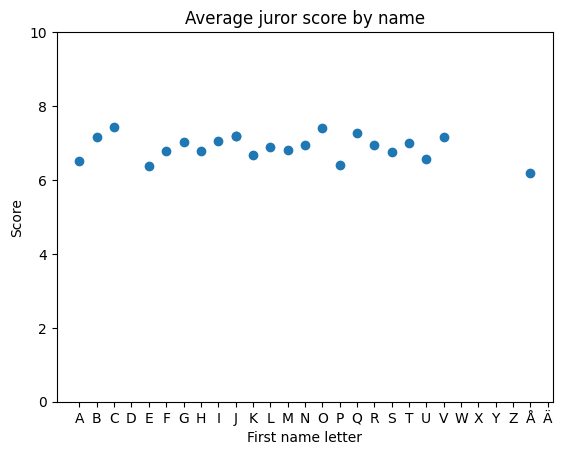

In [167]:
x = []
y = []

for letter in "abcdefghijjklmnopqrstuvwxyzåäö".upper():
    y.append(
        d[
            d["juror"].str.startswith(letter)
        ]["score"].mean())

    x.append(letter)

plt.scatter(x, y)
plt.xlabel("First name letter")
plt.ylabel("Score")
plt.title("Average juror score by name")
plt.ylim(0, 10)

In [ ]:
x = []
y = []

for c in d["country"].unique():
    names = d.loc[d["participant"] == c]
    for i in range(8):
        


plt.scatter(x, y)
plt.xlabel("First name letter")
plt.ylabel("Score")
plt.title("Average juror score by name")
plt.ylim(0, 10)